## 2019 Target Population with M 00-03 and F 00-03

### Prepare all packages

In [1]:
# load packages
!pip install -r requirements.txt
import cfe
import numpy as np
import pandas as pd
from eep153_tools.sheets import read_sheets

Missing dependencies for OracleDemands.


## Input data and filter data

In [2]:
COUNTRY = 'Uganda'
URL = {'Uganda':'https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/'}
DAYS_PER_PERIOD = {'Uganda':7,'Tanzania':7,'ICRISAT':365.25,'Nigeria':7} # Number of days of expenditure recall

In [3]:
# filter for HH_Characteristics with F 00-03 and M 00-03
HH_Characteristics = read_sheets(URL[COUNTRY],sheet='HH Characteristics')
HH_Characteristics_0003 = HH_Characteristics[(HH_Characteristics['F 00-03'] != 0)|(HH_Characteristics ['M 00-03'] != 0)] 

Key available for students@eep153.iam.gserviceaccount.com.


# 2019

In [4]:
HH_Characteristics_0003_2019 = HH_Characteristics_0003[(HH_Characteristics_0003['t'] == '2019-20')]
HH_Characteristics_0003_2019

,i,t,m,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize
1,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.945910
8,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.386294
10,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.609438
474,1021001306,2019-20,Central,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,2.079442
714,1021002010,2019-20,Central,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24335,acb16f9b068549d8a80a37c9d638742f,2019-20,Western,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.791759
24337,ad9b7c4ba614444bb8004eb658693c9f,2019-20,Eastern,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,2.484907
24344,bfdf0d66403440ceab439b1e1c47cdea,2019-20,Eastern,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,2.197225
24354,d24fa50d02c041969a42102d8ebdadc9,2019-20,Eastern,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.079442


In [5]:
import warnings
warnings.filterwarnings("ignore")

# Input year below, here 2019 was used
Expenditure_2019 = read_sheets(URL[COUNTRY],sheet='Expenditures (2019-20)')
Expenditure_2019 

# Fix the data issue with i column, prepare to merge
HH_Characteristics_0003_2019['i'] = HH_Characteristics_0003_2019['i'].astype('str')
Expenditure_2019['i'] = Expenditure_2019['i'].astype('str')

# Merge two dataframe
filtered_expenditures = pd.merge(HH_Characteristics_0003_2019[['i', 't']], Expenditure_2019, on=['i', 't'], how='inner')
filtered_expenditures

Key available for students@eep153.iam.gserviceaccount.com.


,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4000.0,200.0,1000.0,NaN,NaN,NaN,3000.0,NaN
1,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,1000.0,4500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN
2,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5000.0,200.0,500.0,NaN,NaN,NaN,NaN,NaN
3,1021001306,2019-20,Central,1500.0,12000.0,NaN,500.0,NaN,12500.0,NaN,...,NaN,NaN,NaN,200.0,900.0,NaN,NaN,NaN,NaN,NaN
4,1021002010,2019-20,Central,4500.0,12000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,acb16f9b068549d8a80a37c9d638742f,2019-20,Western,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN
1247,ad9b7c4ba614444bb8004eb658693c9f,2019-20,Eastern,3500.0,NaN,NaN,1000.0,NaN,NaN,NaN,...,NaN,NaN,105000.0,500.0,1600.0,NaN,NaN,NaN,NaN,NaN
1248,bfdf0d66403440ceab439b1e1c47cdea,2019-20,Eastern,1200.0,10000.0,NaN,NaN,2800.0,NaN,NaN,...,NaN,NaN,6000.0,100.0,1000.0,NaN,NaN,NaN,1000.0,NaN
1249,d24fa50d02c041969a42102d8ebdadc9,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30000.0,NaN,1200.0,NaN,NaN,NaN,NaN,NaN


##### ps. Because of the data type error, we lost some data so the household change from 1269 to 1251.
###### In the 'i' column, there are some index include words that it can not transfer to numeric.

## Estimation demand system

In [6]:
# get Uganda data 
x = filtered_expenditures

if len(x.columns==5): # stored as a series
    x = x.set_index(['i','t','m']).squeeze()
x.columns.name = 'j'
x = x.stack().dropna()
x.index.names = ['i','t','m','j']

# I changed some columns' name to fit in

y = np.log(x)

z = read_sheets(URL[COUNTRY],sheet='HH Characteristics').set_index(['i','t','m'])
z.columns.name = 'k'
z.index.names=['i','t','m']

p = read_sheets(URL[COUNTRY],sheet='Prices').set_index(['t','m'])
p.columns.name = 'j'

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [7]:
# clear the data type
y.index = y.index.set_levels(y.index.levels[0].astype(str), level=0)
y.index = y.index.set_levels(y.index.levels[1].astype(str), level=1)

z.index = z.index.set_levels(z.index.levels[0].astype(str), level=0)
z.index = z.index.set_levels(z.index.levels[1].astype(str), level=1)

r = cfe.Regression(y=y,d=z)

In [8]:
xhat = r.predicted_expenditures()

In [9]:
r.to_pickle("my %s.pickle" % COUNTRY)

## Plot food demand for certain food

In [10]:
# These are prices per kilogram:
my_t = '2019-20'

pbar = p.xs(my_t,level='t').mean()
pbar = pbar[r.beta.index] # Only use prices for goods we can estimate

my_j = 'Beans'  # Choose a reference good for analysis; should satisfy

assert my_j in pbar.index, f"The label {my_j} does not match a good for which demands have been estimated."

In [11]:
xhat = r.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
x0 = xbar.quantile(0.5)  # Household at 0.5 quantile is median

f"Median income is {x0} in local currency."

'Median income is 115850.04832381503 in local currency.'

In [12]:
#pbar = pbar.fillna(600)

def my_prices(p0,p=pbar,j=my_j):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

Text(0.5, 1.0, '2019 Uganda data')

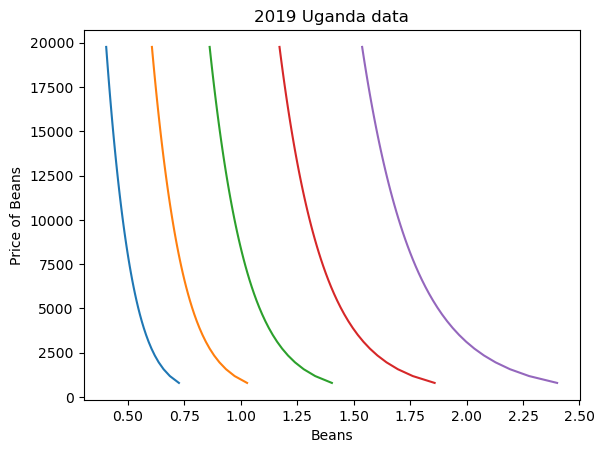

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Values for prices
ref_price = pbar[my_j]
P = np.linspace(ref_price/5,ref_price*5,50)

for x in [x0*s for s in [.25,.5,1.,2,4]]:
    plt.plot([r.demands(x,my_prices(p0))[my_j] for p0 in P],P)

plt.xlabel(my_j)
plt.ylabel(f'Price of {my_j}')
plt.title('2019 Uganda data')

## Plotting Nutrient Demands

In [14]:
from eep153_tools.sheets import read_sheets
import warnings 

# Get FCT:
fct = read_sheets(URL[COUNTRY],
                  sheet='FCT').set_index('j')
fct.columns.name='n'


def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

Key available for students@eep153.iam.gserviceaccount.com.


Text(0, 0.5, 'log nutrient')

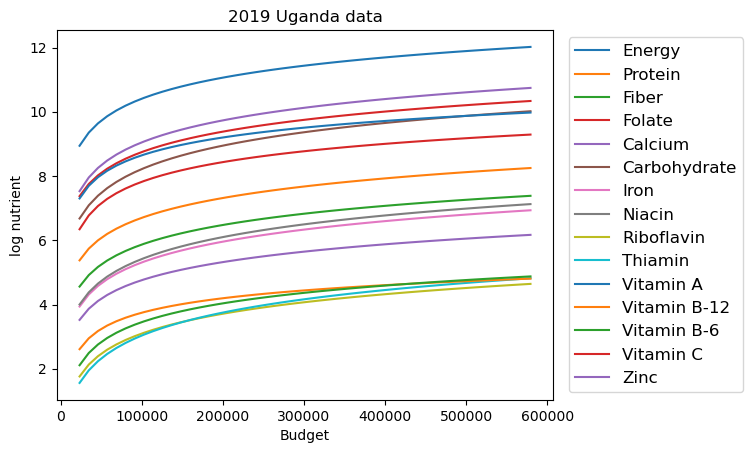

In [15]:
X = np.linspace(x0/5,x0*5,50)

# UseNutrients = ['Protein','Calories','Iron','Calcium']
UseNutrients = fct.columns.tolist()

plt.plot(X,[np.log(nutrient_demand(x,pbar))[UseNutrients] for x in X])
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2019 Uganda data')
plt.xlabel('Budget')
plt.ylabel('log nutrient')

## RDI Nutrition requirement

In [16]:
rdi = read_sheets(URL[COUNTRY],
                  sheet='RDI').set_index('n').replace(np.nan,0)
rdi.columns.name = 'k'

rdi = rdi.replace('',0)
rdi

Key available for students@eep153.iam.gserviceaccount.com.


k,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,,
Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
Carbohydrate,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
Iron,7.0,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
Magnesium,80.0,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


In [17]:
# Find average household characteristics for reference period & place
zbar = r.d.mean()

In [18]:
# This matrix product gives minimum nutrient requirements for average household in reference year & place
my_rdi,my_zbar = rdi.align(zbar.T,axis=1,join='inner')
hh_rdi = my_rdi@my_zbar.T

# But this is per *day*, while our data is per period:
hh_rdi = hh_rdi*DAYS_PER_PERIOD[COUNTRY]
hh_rdi

n
Energy           73845.172414
Protein           1571.439655
Fiber             1033.832414
Folate           13485.862069
Calcium          45617.672414
Carbohydrate      5807.525862
Iron               467.630172
Magnesium        11184.250000
Niacin             516.153448
Phosphorus       33818.267241
Potassium       186760.603448
Riboflavin          40.496207
Thiamin             39.488448
Vitamin A        26815.431034
Vitamin B-12        80.915172
Vitamin B-6         44.177241
Vitamin C         2336.823276
Vitamin E          503.643966
Vitamin K         3191.607759
Zinc               323.031897
dtype: float64

## Nutritional Adequacy

In [19]:
def nutrient_adequacy_ratio(x,p):
    return (nutrient_demand(x,p)/hh_rdi.T).squeeze()

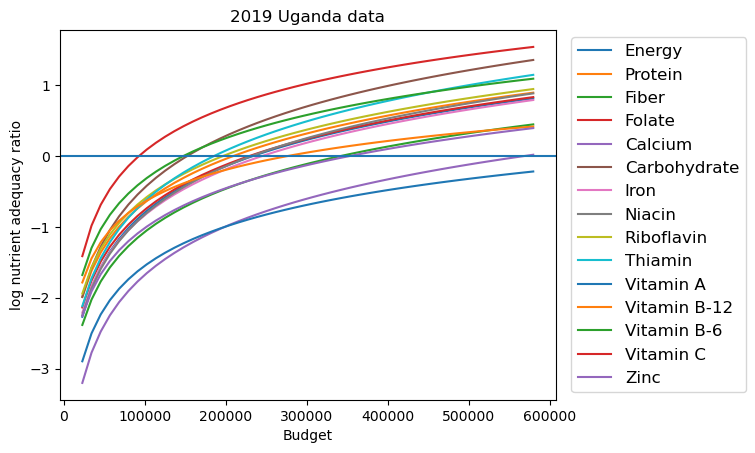

In [20]:
plt.plot(X,[np.log(nutrient_adequacy_ratio(x,pbar))[UseNutrients] for x in X])
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2019 Uganda data')
plt.xlabel('Budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)

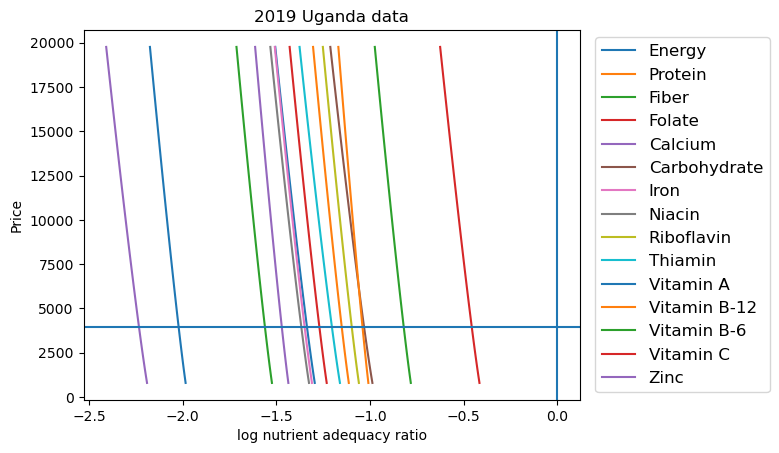

In [21]:
poorer_x = x0/2

plt.plot([np.log(nutrient_adequacy_ratio(poorer_x,my_prices(p0,j=my_j)))[UseNutrients] for p0 in P],P)
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2019 Uganda data')
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(pbar[my_j])